In [41]:
import pandas as pd
fhand=open('Folds5x2_pp.xlsx',errors='ignore')
outputfile=open('HW2dataset.csv','w')
filecontents=fhand.readlines()
for line in filecontents:
    row=line.split()
    for word in row:
        outputfile.write(word)
        outputfile.write(',')
    outputfile.write('\n')
outputfile.close()



In [42]:
xls=pd.ExcelFile('Folds5x2_pp.xlsx')
df1=pd.read_excel(xls,'Sheet1')
#df2=pd.read_excel(xls,'Sheet2')
#df3=pd.read_excel(xls,'Sheet3')
#df4=pd.read_excel(xls,'Sheet4')
#df5=pd.read_excel(xls,'Sheet5')
#dataset=pd.concat([df1,df2,df3,df4,df5])
dataset=df1
dataset=dataset.rename(index=str,columns={"PE":"EP"})

In [43]:
print("Number of rows:",dataset.shape[0])
print("Number of columns:",dataset.shape[1])


Number of rows: 9568
Number of columns: 5


In [46]:
import matplotlib.pyplot as plt

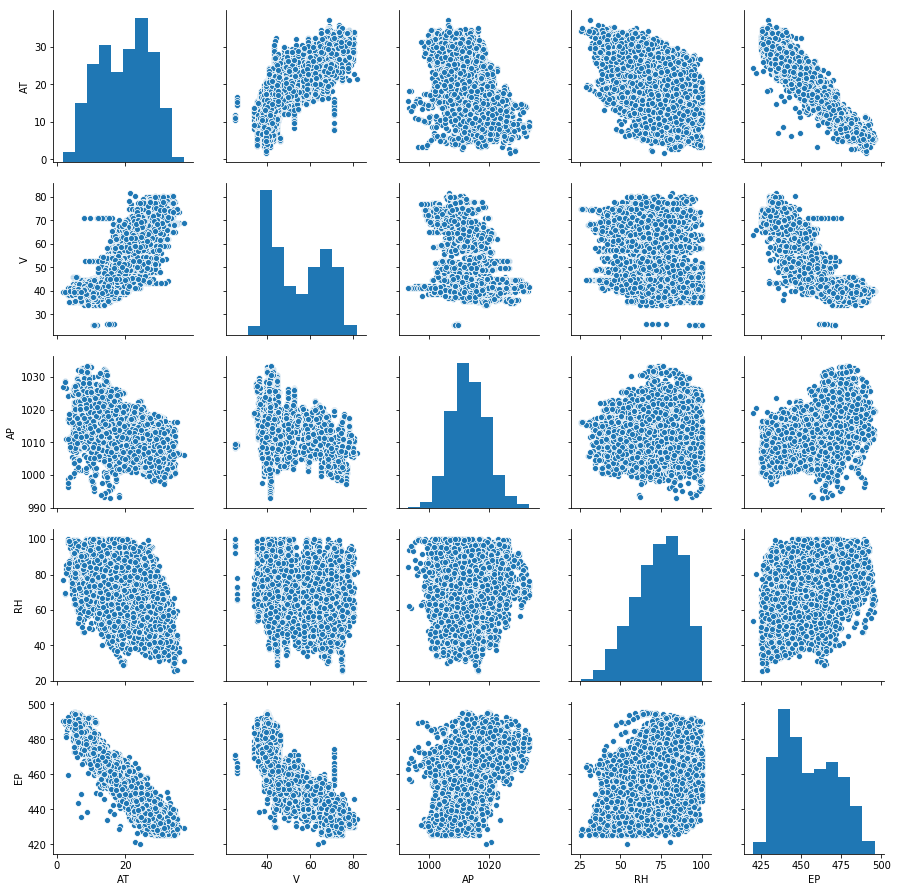

In [57]:
import seaborn as sns
plot=sns.pairplot(dataset,vars=["AT","V","AP","RH","EP"])
plot.savefig("scatterplot_hw2.png")


In [58]:
mean=[]
import numpy as np
mean.append(np.mean(dataset.AT))
mean.append(np.mean(dataset.V))
mean.append(np.mean(dataset.AP))
mean.append(np.mean(dataset.RH))
mean.append(np.mean(dataset.EP))

In [59]:
median=[]
median.append(np.median(dataset.AT))
median.append(np.median(dataset.V))
median.append(np.median(dataset.AP))
median.append(np.median(dataset.RH))
median.append(np.median(dataset.EP))

In [60]:
ranges=[]
ranges.append(dataset.AT.max()-dataset.AT.min())
ranges.append(dataset.V.max()-dataset.V.min())
ranges.append(dataset.AP.max()-dataset.AP.min())
ranges.append(dataset.RH.max()-dataset.RH.min())
ranges.append(dataset.EP.max()-dataset.EP.min())

In [61]:
iqr=[]
q125,q175=np.percentile(dataset.AT,(25,75))
iqr.append((q175-q125))
q225,q275=np.percentile(dataset.V,(25,75))
iqr.append((q275-q225))
q325,q375=np.percentile(dataset.AP,(25,75))
iqr.append((q375-q325))
q425,q475=np.percentile(dataset.RH,(25,75))
iqr.append((q475-q425))
q525,q575=np.percentile(dataset.EP,(25,75))
iqr.append((q575-q525))
q125

13.51

In [62]:
summary_df=pd.DataFrame.from_dict(
{
   "AT":[mean[0],median[0],ranges[0],q125,q175,iqr[0]],
    "V":[mean[1],median[1],ranges[1],q225,q275,iqr[1]],
    "AP":[mean[2],median[2],ranges[2],q325,q375,iqr[2]],
    "RH":[mean[3],median[3],ranges[3],q425,q475,iqr[3]],
    "EP":[mean[4],median[4],ranges[4],q525,q575,iqr[4]],
    
    
}


)

In [63]:
summary_df.rename(index={0:"Mean",1:"Median",2:"Range",3:"First quartile",4:"Third quartile",5:"Inter-quartile range"})

,AT,V,AP,RH,EP
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
First quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
Inter-quartile range,12.210000,24.800000,8.160000,21.502500,28.680000


In [64]:
import statsmodels.api as sm
X_AT=dataset['AT']
Y=dataset['EP']
X_AT=sm.add_constant(X_AT)
model_AT = sm.OLS(Y,X_AT).fit()
predictions_AT_EP = model_AT.predict(X_AT) 


print(model_AT.summary())


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:25:59   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [65]:
AT_params=model_AT.params
AT_params=AT_params[1]


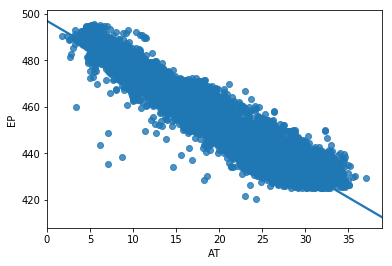

In [66]:
svm1=sns.regplot(x='AT', y='EP', data=dataset)
at_plot = svm1.get_figure() 
at_plot.savefig("at_plot.png")

In [67]:
X_V=dataset['V']
#Y=dataset['EP']
X_V=sm.add_constant(X_V)
model_V = sm.OLS(Y,X_V).fit()
predictions_V_EP = model_V.predict(X_V) 


print(model_V.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:26:02   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [68]:
V_params=model_V.params
V_params=V_params[1]

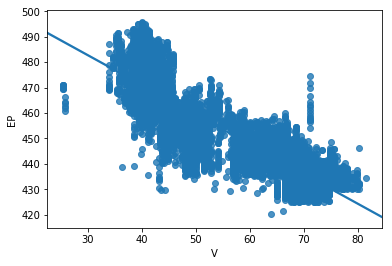

In [69]:
svm2=sns.regplot(x='V', y='EP', data=dataset)
v_plot = svm2.get_figure() 
v_plot.savefig("v_plot.png")

In [70]:
X_AP=dataset['AP']
#Y=dataset['EP']
X_AP=sm.add_constant(X_AP)
model_AP = sm.OLS(Y,X_AP).fit()
predictions_AP_EP = model_AP.predict(X_AP) 


print(model_AP.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:26:04   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [71]:
AP_params=model_AP.params
AP_params=AP_params[1]

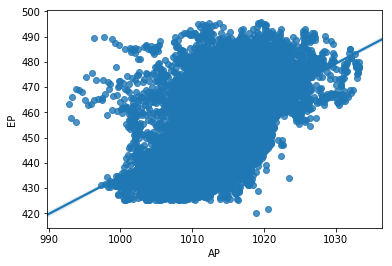

In [72]:
svm3=sns.regplot(x='AP', y='EP', data=dataset)
ap_plot = svm3.get_figure() 
ap_plot.savefig("ap_plot.png")


In [73]:
X_RH=dataset['RH']
#Y=dataset['EP']
X_RH=sm.add_constant(X_RH)
model_RH= sm.OLS(Y,X_RH).fit()
predictions_RH_EP = model_RH.predict(X_RH) 


print(model_RH.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:26:07   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [74]:
RH_params=model_RH.params
RH_params=RH_params[1]

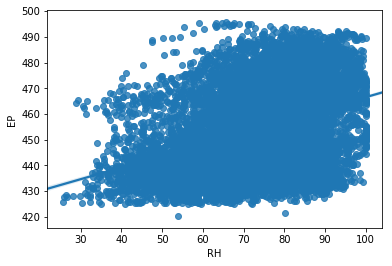

In [75]:
svm4=sns.regplot(x='RH', y='EP', data=dataset)
rh_plot = svm4.get_figure() 
rh_plot.savefig("rh_plot.png")


In [76]:
univar_params=[]
univar_params.append(AT_params)
univar_params.append(V_params)
univar_params.append(AP_params)
univar_params.append(RH_params)
print(univar_params)

[-2.171319958517792, -1.1681351265557118, 1.4898716733991115, 0.4556501022629795]


In [77]:
X_multreg=dataset[['AT','V','AP','RH']]
Y=dataset['EP']
X_multreg=sm.add_constant(X_multreg)
model_multreg = sm.OLS(Y,X_multreg).fit()
predictions_multreg_EP = model_multreg.predict(X_multreg) 


print(model_multreg.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:26:10   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [78]:
multreg_params=model_multreg.params
multreg_params=multreg_params[1:]

In [79]:
print(multreg_params)

AT   -1.977513
V    -0.233916
AP    0.062083
RH   -0.158054
dtype: float64


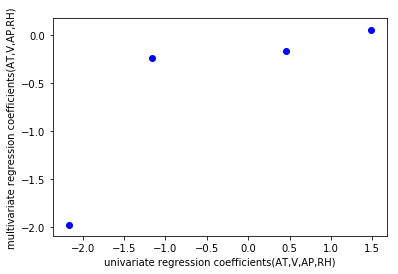

In [83]:
import matplotlib.pyplot as plt
reg_plot=plt.scatter(univar_params,multreg_params,color='blue')
plt.xlabel('univariate regression coefficients(AT,V,AP,RH)')
plt.ylabel('multivariate regression coefficients(AT,V,AP,RH)')
reg_plot=reg_plot.get_figure()
reg_plot.savefig("univariate vs multivariate coeff.png")

In [84]:
from sklearn.preprocessing import PolynomialFeatures


In [85]:
x_at=dataset.iloc[:,0:1]
y_poly=dataset['EP']

In [86]:
def polynomial_reg(xinp,yinp,name,xlabel):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xinp,yinp,color='blue')
    ax.set_title("Polynomial Regression")
    p = PolynomialFeatures(degree=3)
    x_p=p.fit_transform(xinp)
    x_polyreg=sm.add_constant(x_p)
    model_polyreg=sm.OLS(yinp,x_polyreg).fit()
    pred=model_polyreg.predict(x_polyreg)

    poly_plot=plt.plot(xinp,pred,color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel("EP")
    fig.savefig(name+'.png')
    return model_polyreg.summary()


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:30:52   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

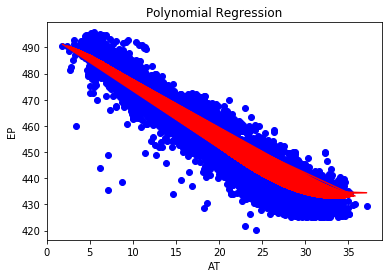

In [87]:
at_poly=polynomial_reg(x_at,y_poly,"AT_polyreg","AT")
print(at_poly)


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:34:43   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

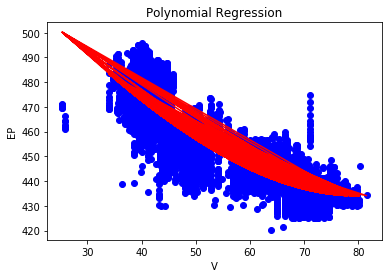

In [88]:
v_poly=polynomial_reg(dataset.iloc[:,1:2],y_poly,"V_polyreg","V")
print(v_poly)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:36:31   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

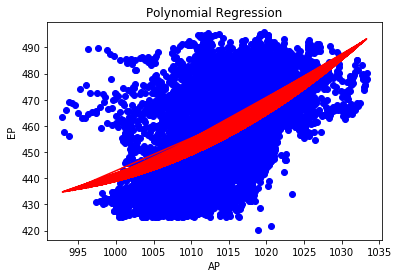

In [89]:
ap_poly=polynomial_reg(dataset.iloc[:,2:3],y_poly,"AP_polyreg","AP")
print(ap_poly)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:38:26   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

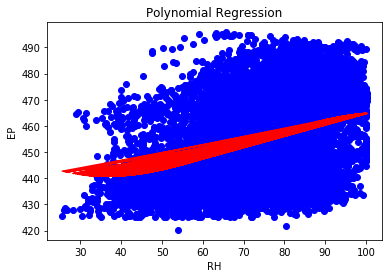

In [90]:
rh_poly=polynomial_reg(dataset.iloc[:,3:4],y_poly,"RH_polyreg","RH")
print(rh_poly)

In [91]:
from statsmodels.formula.api import ols
from scipy import stats

In [92]:
xi=dataset.iloc[:,:-1]
yi=dataset['EP']
linearreg=ols(formula='EP ~ AT+V+AP+RH+AT:V+AT:AP+AT:RH+V:AP+V:RH+AP:RH',data=dataset).fit()
#linear= PolynomialFeatures(interaction_only=True,include_bias=False)
#x_poly=poly.fit_transform(xi)
#x_poly=sm.add_constant(x_poly)
#model_int=sm.OLS(yi,x_poly).fit()
#prediction=model_int.predict(x_poly)

print(linearreg.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:56:54   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [121]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,Y_new, test_size=0.30) 
#new_df_x=pd.DataFrame(X_train)
#new_df_y=pd.DataFrame(y_train)
#new_df=pd.concat([new_df_x,new_df_y],sort=True)


In [151]:

df_new=dataset
df_new['AT*V']=df_new['AT']*df_new['V']
df_new['AT*AP']=df_new['AT']*df_new['AP']
df_new['AT*RH']=df_new['AT']*df_new['RH']
df_new['V*AP']=df_new['V']*df_new['AP']
df_new['V*RH']=df_new['V']*dataset['RH']
df_new['AP*RH']=df_new['AP']*df_new['RH']
df_new['AT**2']=df_new['AT']*df_new['AT']
df_new['V**2']=df_new['V']*df_new['V']
df_new['AP**2']=df_new['AP']*df_new['AP']
df_new['RH**2']=df_new['RH']*df_new['RH']

df_new['EP_new']=df_new['EP']

df_new=df_new.drop('EP',1)
df_new=df_new.rename(index = str, columns ={"EP_new" : "EP"})
print(df_new)

#X_new = df_new.iloc[:,:4]
#Y_new=df_new.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,:-1],df_new['EP'], test_size=0.30) 

         AT      V       AP     RH       AT*V       AT*AP      AT*RH  \
0     14.96  41.76  1024.07  73.17   624.7296  15320.0872  1094.6232   
1     25.18  62.96  1020.04  59.08  1585.3328  25684.6072  1487.6344   
2      5.11  39.40  1012.16  92.14   201.3340   5172.1376   470.8354   
3     20.86  57.32  1010.24  76.64  1195.6952  21073.6064  1598.7104   
4     10.82  37.50  1009.23  96.62   405.7500  10919.8686  1045.4284   
5     26.27  59.44  1012.23  58.77  1561.4888  26591.2821  1543.8879   
6     15.89  43.96  1014.02  75.24   698.5244  16112.7778  1195.5636   
7      9.48  44.71  1019.12  66.43   423.8508   9661.2576   629.7564   
8     14.64  45.00  1021.78  41.25   658.8000  14958.8592   603.9000   
9     11.74  43.56  1015.14  70.72   511.3944  11917.7436   830.2528   
10    17.99  43.72  1008.64  75.04   786.5228  18145.4336  1349.9696   
11    20.14  46.93  1014.66  64.22   945.1702  20435.2524  1293.3908   
12    24.34  73.50  1011.31  84.15  1788.9900  24615.2854  2048.

In [153]:
#linear regression model with just the predictors
X_train_lineardata=X_train.iloc[:,:4]
from sklearn import metrics
X_new_linear1=sm.add_constant(X_train_lineardata)
model_new_linear1 = sm.OLS(y_train,X_new_linear1).fit()
predictions_new_linear = model_new_linear1.predict(X_new_linear1)

linear_train_error=metrics.mean_squared_error(y_train,predictions_new_linear)
print(linear_train_error)
print(model_new_linear1.summary())

20.8307738251317
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.170e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:34:23   Log-Likelihood:                -19670.
No. Observations:                6697   AIC:                         3.935e+04
Df Residuals:                    6692   BIC:                         3.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.8688     11.709   

In [154]:
#getting test error values
X_testlineardata=X_test.iloc[:,:4]
X_test_linear2=sm.add_constant(X_testlineardata)
predictions_new_linear2 = model_new_linear1.predict(X_test_linear2)

linear_test_error=metrics.mean_squared_error(y_test,predictions_new_linear2)
print(linear_test_error)

20.6451515866257


In [155]:
#regression model with interaction terms and quadratic non-linearities
from sklearn.linear_model import LinearRegression
linearmod=LinearRegression()
mod=linearmod.fit(X_train,y_train)
test_prediction1=linearmod.predict(X_test)
train_prediction1=linearmod.predict(X_train)
linear_int_train_error=mean_squared_error(y_train,train_prediction1)
linear_int_test_error=mean_squared_error(y_test,test_prediction1)
print(linear_int_train_error)
print(linear_int_test_error)





18.102328925163228
18.136148658519197


In [156]:
X_new_linear2=sm.add_constant(X_train)
model_new_linear2 = sm.OLS(y_train,X_new_linear2).fit()
predictions_new_linear2 = model_new_linear2.predict(X_new_linear2)

linear_train_error_new=metrics.mean_squared_error(y_train,predictions_new_linear2)
print(linear_train_error_new)
print(model_new_linear2.summary())

18.102328925162926
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7195.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:35:44   Log-Likelihood:                -19200.
No. Observations:                6697   AIC:                         3.843e+04
Df Residuals:                    6682   BIC:                         3.853e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7539.0911   1454.388 

In [170]:
#model after removing insignificant variables based on p values
lm=LinearRegression()
model_new_linear2 = lm.fit(X_train[['AP','RH','AT*V','AT*RH','AP*RH','AT**2','AP**2','RH**2']],y_train)
test_prediction2=lm.predict(X_test[['AP','RH','AT*V','AT*RH','AP*RH','AT**2','AP**2','RH**2']])
train_prediction2=lm.predict(X_train[['AP','RH','AT*V','AT*RH','AP*RH','AT**2','AP**2','RH**2']])
l_int_train_error=mean_squared_error(y_train,train_prediction2)
l_int_test_error=mean_squared_error(y_test,test_prediction2)
print(l_int_train_error)
print(l_int_test_error)






20.248411121659622
20.04420371559952


In [171]:
X_new_l2=sm.add_constant(X_train[['AP','RH','AT*V','AT*RH','AP*RH','AT**2','AP**2','RH**2']])
model_new_l2 = sm.OLS(y_train,X_new_l2).fit()
predictions_new_l2 = model_new_l2.predict(X_new_l2)

#linear_train_error_new=metrics.mean_squared_error(y_train,predictions_new_linear2)
#print(linear_train_error_new)
print(model_new_l2.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:39   Log-Likelihood:                -19575.
No. Observations:                6697   AIC:                         3.917e+04
Df Residuals:                    6688   BIC:                         3.923e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5276.8056   1152.472     -4.579      0.0

In [157]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error


In [158]:
trainerror=[]
list_1_k=[]
k_values=[]
for i in range(1,101):  
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)   
    knn.fit(X_train,y_train)
    list_1_k.append((1/i))
    k_values.append(i)
    pred_y = knn.predict(X_train)
    trainerror.append(mean_squared_error(pred_y,y_train))
    trainerrorandkvalues=zip(k_values,trainerror)
trainerrorandkvalues_list=list(trainerrorandkvalues) 
min_err_train=min(trainerrorandkvalues_list,key=lambda x:x[1]) 
print(min_err_train)

(1, 0.0)


In [167]:
testerror=[]
for k in range(1,101):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)   
    model.fit(X_train,y_train)
    prediction_y = model.predict(X_test)
    testerror.append(mean_squared_error(prediction_y,y_test))
    testerrorandkvalues=zip(k_values,testerror)
testerrorandkvalues_list=list(testerrorandkvalues) 
min_err_test=min(testerrorandkvalues_list,key=lambda x:x[1]) 
print(min_err_test)
    

(4, 16.312402418582376)


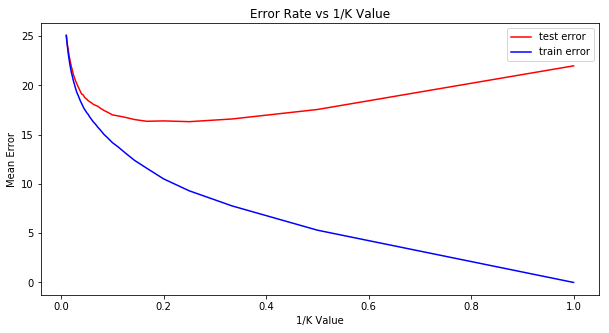

In [160]:
plt.figure(figsize=(10,5))  
#plt.xlim(208,0)
test_error_plot=plt.plot(list_1_k,testerror,color='red',label='test error') #plotting test errors for k values
train_error_plot=plt.plot(list_1_k,trainerror,color='blue',label='train error') #plotting train errors for k values
plt.legend(['test error', 'train error'], loc=1)


plt.title('Error Rate vs 1/K Value')  
plt.xlabel('1/K Value')  
plt.ylabel('Mean Error') 
plt.savefig('knnregression.png')

In [161]:
from sklearn import preprocessing

In [162]:
normalized_X_train = preprocessing.normalize(X_train)

In [163]:
normalized_X_test= preprocessing.normalize(X_test)

In [164]:
trainerror_new=[]
k_values=[]
min_trainerror_new=[]
for i in range(1,101):  
    knn_new = neighbors.KNeighborsRegressor(n_neighbors = i)   
    knn_new.fit(normalized_X_train,y_train)
    k_values.append(i)
    pred_y_new = knn_new.predict(normalized_X_train)
    trainerror_new.append(mean_squared_error(pred_y_new,y_train))
                                          #adding all k values to a list
    trainerror_kvalues=zip(k_values,trainerror_new)
trainerror_kvalues_list=list(trainerror_kvalues) 
err_result=min(trainerror_kvalues_list,key=lambda x:x[1]) 



print(err_result)

(1, 0.0)


In [168]:
testerror_new=[]
for k in range(1,101):
    model_new = neighbors.KNeighborsRegressor(n_neighbors = k)   
    model_new.fit(normalized_X_train,y_train)
    prediction_y_new = model_new.predict(normalized_X_test)
    testerror_new.append(mean_squared_error(prediction_y_new,y_test))
    testerror_kvalues=zip(k_values,testerror_new)
testerror_kvalues_list=list(testerror_kvalues) 
errs_result=min(testerror_kvalues_list,key=lambda x:x[1]) 
print(errs_result)


(13, 17.550246783278613)


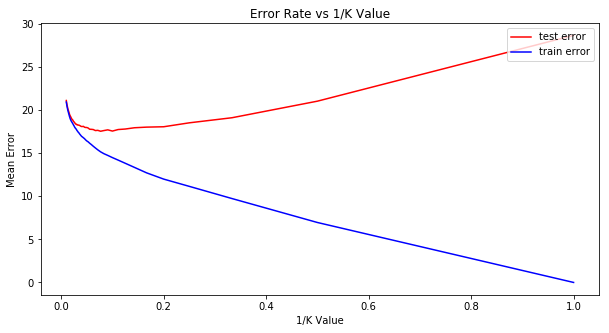

In [166]:
plt.figure(figsize=(10,5))  
#plt.xlim(208,0)
test_error_plot_new=plt.plot(list_1_k,testerror_new,color='red',label='test error') #plotting test errors for k values
train_error_plot_new=plt.plot(list_1_k,trainerror_new,color='blue',label='train error') #plotting train errors for k values
plt.legend(['test error', 'train error'], loc=1)


plt.title('Error Rate vs 1/K Value')  
plt.xlabel('1/K Value')  
plt.ylabel('Mean Error') 
plt.savefig('knnregression2.png')